In [ ]:
# 5.7 高级处理-缺失值处理

# 如何处理nan
- 获取缺失值的标记方式(NaN或者其他标记方式)

- 如果缺失值的标记方式是NaN

    - 判断数据中是否包含NaN：
        - pd.isnull(df),
        - pd.notnull(df)
 
    - 存在缺失值nan:

        - 1、删除存在缺失值的:dropna(axis='rows')
            - 注：不会修改原数据，需要接受返回值

        - 2、替换缺失值:fillna(value, inplace=True)
            - value:替换成的值
            - inplace:True:会修改原数据，False:不替换修改原数据，生成新的对象

- 如果缺失值没有使用NaN标记，比如使用"？"
    - 先替换‘?’为np.nan，然后继续处理

# 电影数据的缺失值处理

- 电影数据文件获取

In [8]:
import pandas as pd
import numpy as np
# 读取电影数据
movie = pd.read_csv("./IMDB-Movie-Data.csv")
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## 判断缺失值是否存在
- pd.notnull()

In [5]:
pd.notnull(movie)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,False,True
8,True,True,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,True,True


In [8]:
np.all(pd.notnull(movie))

False

## 存在缺失值nan,并且是np.nan

- 1、删除

pandas删除缺失值，使用dropna的前提是，缺失值的类型必须是np.nan

In [2]:
# 不修改原数据
movie.dropna()

# 可以定义新的变量接受或者用原来的变量名
data = movie.dropna()

- 2、替换缺失值

In [11]:
# 替换存在缺失值的样本的两列
# 替换填充平均值，中位数
# moive['Revenue (Millions)'].fillna(movie['Revenue (Millions)'].mean(),inplace=True)

In [3]:
movie.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [13]:
movie['Title'].tail()

995      Secret in Their Eyes
996           Hostel: Part II
997    Step Up 2: The Streets
998              Search Party
999                Nine Lives
Name: Title, dtype: object

In [9]:
for i in movie.columns:
    if np.all(pd.notnull(movie[i]))==False:
        print(i)
        movie[i].fillna(movie[i].mean(),inplace=True)

Revenue (Millions)
Metascore


## 不是缺失值nan，有默认标记的

数据是这样的：
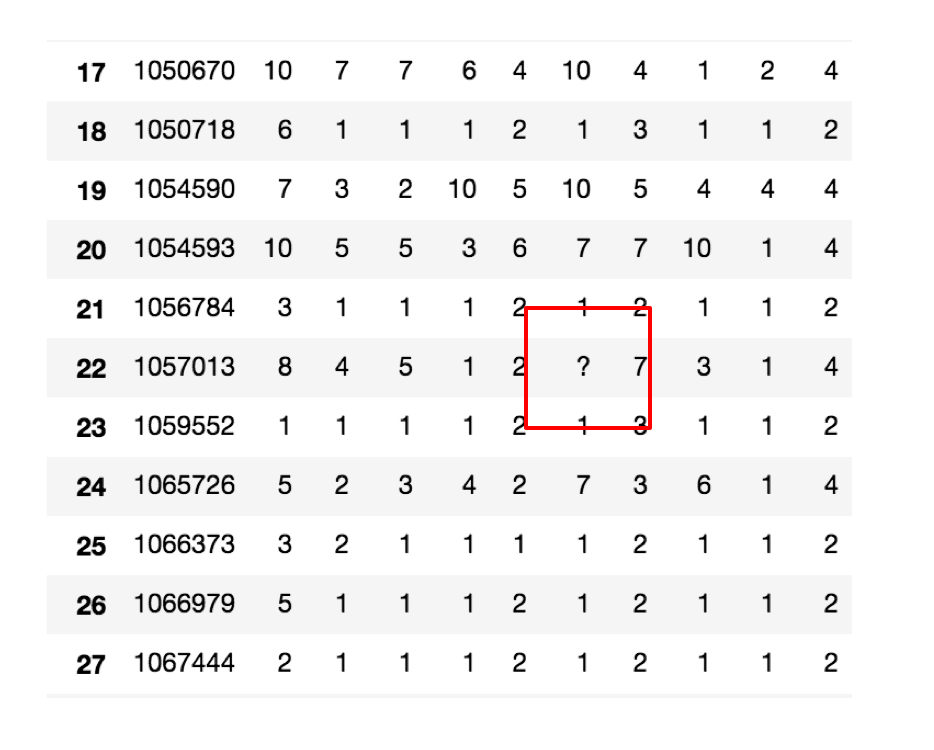

In [11]:
wis = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data")
wis.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


- **处理思路分析：**
- 1、先替换‘?’为np.nan

    - df.replace(to_replace=, value=)
        - to_replace:替换前的值
        - value:替换后的值

In [15]:
# 把一些其它值标记的缺失值，替换成np.nan
wis = wis.replace(to_replace='?',value=np.nan)

- 2、再进行缺失值的处理

In [16]:
# 删除
wis = wis.dropna()

# 小结
- isnull、notnull判断是否存在缺失值【知道】
    - np.any(pd.isnull(movie)) # 里面如果有一个缺失值,就返回True
    - np.all(pd.notnull(movie)) # 里面如果有一个缺失值,就返回False
- dropna删除np.nan标记的缺失值【知道】
    - movie.dropna()
- fillna填充缺失值【知道】
    - movie[i].fillna(value=movie[i].mean(), inplace=True)
- replace替换具体某些值【知道】
    - wis.replace(to_replace="?", value=np.NaN)

In [ ]:
# 5.8 高级处理-数据离散化

In [20]:
# 3. 股票的涨跌幅离散化
# 3.1 读取股票数据
data = pd.read_csv("./stock_day.csv")
p_change = data['p_change']
print(p_change.tail())
'''
1. pd.qcut() 把数据大致分为数量相等的几类
'''
# 自行分组
qcut = pd.qcut(p_change,10)
# 计算分到每个组数据个数
qcut.value_counts()

2015-03-06    8.51
2015-03-05    2.02
2015-03-04    1.57
2015-03-03    1.44
2015-03-02    2.62
Name: p_change, dtype: float64


(5.27, 10.03]                    65
(0.26, 0.94]                     65
(-0.462, 0.26]                   65
(-10.030999999999999, -4.836]    65
(2.938, 5.27]                    64
(1.738, 2.938]                   64
(-1.352, -0.462]                 64
(-2.444, -1.352]                 64
(-4.836, -2.444]                 64
(0.94, 1.738]                    63
Name: p_change, dtype: int64

In [22]:
'''
2. pd.cut() 自行指定分组区间
'''
# 自己指定分组区间
bins = [-100, -7, -5, -3, 0, 3, 5, 7, 100]
cut = pd.cut(p_change,bins)
cut.value_counts()

(0, 3]        215
(-3, 0]       188
(3, 5]         57
(-5, -3]       51
(7, 100]       35
(5, 7]         35
(-100, -7]     34
(-7, -5]       28
Name: p_change, dtype: int64

In [29]:
# 得出one-hot编码矩阵
dummies = pd.get_dummies(cut)
dummies

,"(-100, -7]","(-7, -5]","(-5, -3]","(-3, 0]","(0, 3]","(3, 5]","(5, 7]","(7, 100]"
2018-02-27,0,0,0,0,1,0,0,0
2018-02-26,0,0,0,0,0,1,0,0
2018-02-23,0,0,0,0,1,0,0,0
2018-02-22,0,0,0,0,1,0,0,0
2018-02-14,0,0,0,0,1,0,0,0
2018-02-13,0,0,0,0,1,0,0,0
2018-02-12,0,0,0,0,0,1,0,0
2018-02-09,0,1,0,0,0,0,0,0
2018-02-08,0,0,0,0,1,0,0,0
2018-02-07,0,0,0,1,0,0,0,0


小结
- 数据离散化【知道】
    - 可以用来减少给定连续属性值的个数
    在连续属性的值域上，将值域划分为若干个离散的区间，最后用不同的符号或整数值代表落在每个子区间中- 的属性值。
- qcut、cut实现数据分组【知道】
    - qcut:大致分为相同的几组
    - cut:自定义分组区间
- get_dummies实现哑变量矩阵【知道】

In [25]:
# 5.9 高级处理-合并

In [31]:
'''
1. pd.concat实现数据合并

    pd.concat([data1, data2], axis=1)
        按照行或列进行合并,axis=0为列索引，axis=1为行索引

比如我们将刚才处理好的one-hot编码与原数据合并
'''
pd.concat([data,dummies],axis=1).head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,...,v_ma20,turnover,"(-100, -7]","(-7, -5]","(-5, -3]","(-3, 0]","(0, 3]","(3, 5]","(5, 7]","(7, 100]"
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,...,55576.11,2.39,0,0,0,0,1,0,0,0
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,...,56007.50,1.53,0,0,0,0,0,1,0,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,...,56372.85,1.32,0,0,0,0,1,0,0,0
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,...,60149.60,0.90,0,0,0,0,1,0,0,0
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,...,61716.11,0.58,0,0,0,0,1,0,0,0


2. pd.merge

- pd.merge(left, right, how='inner', on=None)
    - 可以指定按照两组数据的共同键值对合并或者左右各自
    - left: DataFrame
    - right: 另一个DataFrame
    - on: 指定的共同键
    - how:按照什么方式连接

| Merge method | SQL Join Name      | Description                               |
| :----------- | :----------------- | :---------------------------------------- |
| `left`       | `LEFT OUTER JOIN`  | Use keys from left frame only             |
| `right`      | `RIGHT OUTER JOIN` | Use keys from right frame only            |
| `outer`      | `FULL OUTER JOIN`  | Use union of keys from both frames        |
| `inner`      | `INNER JOIN`       | Use intersection of keys from both frames |


In [36]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                    'key2':['K0','K1','K0','K1'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key1':['K0','K1','K1','K2'],
                    'key2':['K0','K0','K0','K0'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})
# 默认内连接
result = pd.merge(left,right,on=['key1','key2'])
print(left)
print(right)
print("-------------内连接----------------")
print(result)

print()
print("-------------左连接----------------")
# 左连接
result = pd.merge(left,right,how='left',on=['key1','key2'])
print(result)

print("-------------右连接----------------")
# 右连接
result = pd.merge(left,right,how='right',on=['key1','key2'])
print(result)

print("-------------外连接----------------")
# 右连接
result = pd.merge(left,right,how='outer',on=['key1','key2'])
print(result)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K2   K0
-------------内连接----------------
    A   B key1 key2   C   D
0  A0  B0   K0   K0  C0  D0
1  A2  B2   K1   K0  C1  D1
2  A2  B2   K1   K0  C2  D2

-------------左连接----------------
    A   B key1 key2    C    D
0  A0  B0   K0   K0   C0   D0
1  A1  B1   K0   K1  NaN  NaN
2  A2  B2   K1   K0   C1   D1
3  A2  B2   K1   K0   C2   D2
4  A3  B3   K2   K1  NaN  NaN
-------------右连接----------------
     A    B key1 key2   C   D
0   A0   B0   K0   K0  C0  D0
1   A2   B2   K1   K0  C1  D1
2   A2   B2   K1   K0  C2  D2
3  NaN  NaN   K2   K0  C3  D3
-------------外连接----------------
     A    B key1 key2    C    D
0   A0   B0   K0   K0   C0   D0
1   A1   B1   K0   K1  NaN  NaN
2   A2   B2   K1   K0   C1   D1
3   A2   B2   K1   K0   C2   D2
4   A3   B3   K2   K1  NaN  NaN
5  NaN  NaN   K2   K0   C3   D3


总结
- pd.concat([数据1, 数据2], axis=**)【知道】
- pd.merge(left, right, how=, on=)【知道】
    - how -- 以何种方式连接
    - on -- 连接的键的依据是哪几个